# Projet 2: Analyse des données de systèmes éducatifs
Dans ce projet, nous explorons les données de la Banque Mondiale pour déterminer les pays où Academy pourrait s’implanter. Nous allons procéder étape par étape : chargement, nettoyage, réduction du périmètre et consolidation finale des données.

## Partie 1

### Étape 1 : Chargement des données

Nous commençons par charger les cinq fichiers fournis par la Banque Mondiale.
Chaque fichier contient des informations complémentaires sur les pays, les indicateurs et les métadonnées associées.

In [317]:
# Importation des bibliothèques
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [318]:
# Configuration pour l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Liste des fichiers à analyser
fichiers = [
    'EdStatsCountry.csv',
    'EdStatsCountry-Series.csv', 
    'EdStatsData.csv',
    'EdStatsFootNote.csv',
    'EdStatsSeries.csv'
]

# Chargement des données
CountrySeries = pd.read_csv("EdStatsCountry-Series.csv")
Country       = pd.read_csv("EdStatsCountry.csv")
Data          = pd.read_csv("EdStatsData.csv")
FootNote      = pd.read_csv("EdStatsFootNote.csv")
Series        = pd.read_csv("EdStatsSeries.csv")

print("-" * 130)
print("Dataset EdStatsCountry-Series.csv: chargé avec succès sous le nom CountrySeries")
print("\nDataset EdStatsCountry.csv: chargé avec succès sous le nom Country")
print("\nDataset EdStatsData.csv: chargé avec succès sous le nom Data ")
print("\nDataset EdStatsFootNote.csv: chargé avec succès sous le nom FootNote")
print("\nDataset EdStatsSeries.csv: chargé avec succès sous le nom Series")
print(f"\n {len(fichiers)} fichiers chargés au total")
print("-" * 70)

----------------------------------------------------------------------------------------------------------------------------------
Dataset EdStatsCountry-Series.csv: chargé avec succès sous le nom CountrySeries

Dataset EdStatsCountry.csv: chargé avec succès sous le nom Country

Dataset EdStatsData.csv: chargé avec succès sous le nom Data 

Dataset EdStatsFootNote.csv: chargé avec succès sous le nom FootNote

Dataset EdStatsSeries.csv: chargé avec succès sous le nom Series

 5 fichiers chargés au total
----------------------------------------------------------------------


### Étape 2 : Collecte des informations sur chaque dataset

#### 1. Dataset EdStatsCountry-Series (CountrySeries):  Permet de savoir quels indicateurs sont disponibles pour chaque pays.

Une ligne = une combinaison (pays, indicateur).

- **Nous allons analyser :**
    - La structure et le nombre de lignes/colonnes
    - Les doublons
    - Les colonnes vides ou inutiles
    - Les types de données (catégorielles ou numériques)

In [319]:
# 1. Définir des lignes
print(" * Structure des données:")
print(f"      - Dimensions: {CountrySeries.shape[0]} lignes × {CountrySeries.shape[1]} colonnes")
print(f"      - Colonnes: {list(CountrySeries.columns[:5])}{'...' if len(CountrySeries.columns) > 5 else ''}")

# Aperçu des 5 premières lignes
print(f"\n • Aperçu des données:")
display(CountrySeries.head())
        
# 2. Calcul des doublons
print(f"\n • Gestion des doublons ")
nb_doublons = CountrySeries.duplicated().sum()
print(f"      - Nombre de doublons: {nb_doublons}")
if nb_doublons > 0:
    print(f"  - Proportion de doublons: {nb_doublons/len(CountrySeries)*100:.2f}%")
            # On supprimera les doublons si nécessaire

#3. Calcul des valeurs manquantes
valeurs_manquantes = CountrySeries.isnull().sum()
prop_manquantes = (valeurs_manquantes / len(CountrySeries) * 100).round(2)
        
### Affichage des colonnes avec des valeurs manquantes
colonnes_avec_nan = prop_manquantes[prop_manquantes > 0]
if len(colonnes_avec_nan) > 0:
    print(" * Colonnes avec valeurs manquantes:")
    for col, prop in colonnes_avec_nan.head(10).items():
        print(f"      - {col}: {valeurs_manquantes[col]} ({prop}%)")
    if len(colonnes_avec_nan) > 10:
        print(f"      -  ... et {len(colonnes_avec_nan)-10} autres colonnes")
    else:
        print("Aucune valeur manquante détectée")
        
# 4. Statistiques descriptives pour colonnes numériques
colonnes_numeriques = CountrySeries.select_dtypes(include=[np.number]).columns
if len(colonnes_numeriques) > 0:
    print(f"\n • Statistiques descritives ({len(colonnes_numeriques)} colonnes numériques):")
    print(CountrySeries[colonnes_numeriques].describe())
        
#5. Analyse des colonnes catégorielles
colonnes_categorielles = CountrySeries.select_dtypes(include=['object']).columns
if len(colonnes_categorielles) > 0:
    print(f"\nColonnes catégorielles ({len(colonnes_categorielles)} colonnes):")
    for col in colonnes_categorielles[:5]:  # Limiter à 5 colonnes
        nb_uniques = CountrySeries[col].nunique()
        print(f" {col}: {nb_uniques} valeurs uniques")
        if nb_uniques <= 10:  # Afficher les valeurs si pas trop nombreuses
            print(f"Valeurs: {CountrySeries[col].value_counts().head(3).to_dict()}")

 * Structure des données:
      - Dimensions: 613 lignes × 4 colonnes
      - Colonnes: ['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3']

 • Aperçu des données:


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN



 • Gestion des doublons 
      - Nombre de doublons: 0
 * Colonnes avec valeurs manquantes:
      - Unnamed: 3: 613 (100.0%)
Aucune valeur manquante détectée

 • Statistiques descritives (1 colonnes numériques):
       Unnamed: 3
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

Colonnes catégorielles (3 colonnes):
 CountryCode: 211 valeurs uniques
 SeriesCode: 21 valeurs uniques
 DESCRIPTION: 97 valeurs uniques


Après analyse, la colonne "Unnamed: 3" est inutilisable.

In [320]:
CountrySeries = CountrySeries.drop("Unnamed: 3", axis = 1)

#### 2.Dataset EdStatsCountry(Country)
Une ligne = un pays

- **Objectifs :**
    - Identifier les colonnes utiles (région, revenu, statut de développement)
    - Supprimer les doublons et les lignes incomplètes
    - Vérifier les types de variables

In [321]:
# 1. Définir des lignes
print(" * Structure des données:")
print(f"      - Dimensions: {Country.shape[0]} lignes × {Country.shape[1]} colonnes")
print(f"      - Colonnes: {list(Country.columns[:5])}{'...' if len(Country.columns) > 5 else ''}")

# Aperçu des 5 premières lignes
print(f"\n * Aperçu des données:")
display(Country.head())
        
# 2. Calcul des doublons
print(f"\n * Gestion des doublons ")
nb_doublons = Country.duplicated().sum()
print(f"      - Nombre de doublons: {nb_doublons}")
if nb_doublons > 0:
    print(f"  - Proportion de doublons: {nb_doublons/len(Country)*100:.2f}%")
            # On supprimera les doublons si nécessaire

#3. Calcul des valeurs manquantes
valeurs_manquantes = Country.isnull().sum()
prop_manquantes = (valeurs_manquantes / len(Country) * 100).round(2)
        
### Affichage des colonnes avec des valeurs manquantes
colonnes_avec_nan = prop_manquantes[prop_manquantes > 0]
if len(colonnes_avec_nan) > 0:
    print(" * Colonnes avec valeurs manquantes:")
    for col, prop in colonnes_avec_nan.head(10).items():
        print(f"      - {col}: {valeurs_manquantes[col]} ({prop}%)")
    if len(colonnes_avec_nan) > 10:
        print(f"      -  ... et {len(colonnes_avec_nan)-10} autres colonnes")
    else:
        print("Aucune valeur manquante détectée")
        
# 4. Statistiques descriptives pour colonnes numériques
colonnes_numeriques = Country.select_dtypes(include=[np.number]).columns
if len(colonnes_numeriques) > 0:
    print(f"\n * Statistiques descritives ({len(colonnes_numeriques)} colonnes numériques):")
    print(Country[colonnes_numeriques].describe())
        
#5. Analyse des colonnes catégorielles
colonnes_categorielles = Country.select_dtypes(include=['object']).columns
if len(colonnes_categorielles) > 0:
    print(f"\nColonnes catégorielles ({len(colonnes_categorielles)} colonnes):")
    for col in colonnes_categorielles[:5]:  # Limiter à 5 colonnes
        nb_uniques = Country[col].nunique()
        print(f" {col}: {nb_uniques} valeurs uniques")
        if nb_uniques <= 10:  # Afficher les valeurs si pas trop nombreuses
            print(f"Valeurs: {Country[col].value_counts().head(3).to_dict()}")

 * Structure des données:
      - Dimensions: 241 lignes × 32 colonnes
      - Colonnes: ['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code']...

 * Aperçu des données:


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN



 * Gestion des doublons 
      - Nombre de doublons: 0
 * Colonnes avec valeurs manquantes:
      - 2-alpha code: 3 (1.24%)
      - Currency Unit: 26 (10.79%)
      - Special Notes: 96 (39.83%)
      - Region: 27 (11.2%)
      - Income Group: 27 (11.2%)
      - WB-2 code: 1 (0.41%)
      - National accounts base year: 36 (14.94%)
      - National accounts reference year: 209 (86.72%)
      - SNA price valuation: 44 (18.26%)
      - Lending category: 97 (40.25%)
      -  ... et 18 autres colonnes

 * Statistiques descritives (4 colonnes numériques):
       National accounts reference year  Latest industrial data  \
count                          32.00000              107.000000   
mean                         2001.53125             2008.102804   
std                             5.24856                2.616834   
min                          1987.00000             2000.000000   
25%                          1996.75000             2007.500000   
50%                          2002.00000   

Après analyse, la colonne "Unnamed: 31" est inutilisable.

In [322]:
Country = Country.drop("Unnamed: 31", axis = 1)

#### 3.Dataset EdStatsData(Data): 
Une ligne = une mesure pour un indicateur donné, un pays et une année

- Ce fichier étant volumineux, nous devons :
    - Étudier les colonnes d’années
    - Évaluer la couverture des données
    - Nettoyer les années non pertinentes

In [323]:
# 1. Définir des lignes
print(" * Structure des données:")
print(f"      - Dimensions: {Data.shape[0]} lignes × {Data.shape[1]} colonnes")
print(f"      - Colonnes: {list(Data.columns[:5])}{'...' if len(Data.columns) > 5 else ''}")

# Aperçu des 5 premières lignes
print(f"\n * Aperçu des données:")
display(Data.head())
        
# 2. Calcul des doublons
print(f"\n * Gestion des doublons ")
nb_doublons = Data.duplicated().sum()
print(f"      - Nombre de doublons: {nb_doublons}")
if nb_doublons > 0:
    print(f"  - Proportion de doublons: {nb_doublons/len(Data)*100:.2f}%")
            # On supprimera les doublons si nécessaire

#3. Calcul des valeurs manquantes
valeurs_manquantes = Data.isnull().sum()
prop_manquantes = (valeurs_manquantes / len(Data) * 100).round(2)
        
### Affichage des colonnes avec des valeurs manquantes
colonnes_avec_nan = prop_manquantes[prop_manquantes > 0]
if len(colonnes_avec_nan) > 0:
    print(" * Colonnes avec valeurs manquantes:")
    for col, prop in colonnes_avec_nan.head(10).items():
        print(f"      - {col}: {valeurs_manquantes[col]} ({prop}%)")
    if len(colonnes_avec_nan) > 10:
        print(f"      -  ... et {len(colonnes_avec_nan)-10} autres colonnes")
    else:
        print("Aucune valeur manquante détectée")
        
# 4. Statistiques descriptives pour colonnes numériques
colonnes_numeriques = Data.select_dtypes(include=[np.number]).columns
if len(colonnes_numeriques) > 0:
    print(f"\n * Statistiques descritives ({len(colonnes_numeriques)} colonnes numériques):")
    print(Data[colonnes_numeriques].describe())
        
#5. Analyse des colonnes catégorielles
colonnes_categorielles = Data.select_dtypes(include=['object']).columns
if len(colonnes_categorielles) > 0:
    print(f"\nColonnes catégorielles ({len(colonnes_categorielles)} colonnes):")
    for col in colonnes_categorielles[:5]:  # Limiter à 5 colonnes
        nb_uniques = Data[col].nunique()
        print(f" {col}: {nb_uniques} valeurs uniques")
        if nb_uniques <= 10:  # Afficher les valeurs si pas trop nombreuses
            print(f"Valeurs: {Data[col].value_counts().head(3).to_dict()}")

 * Structure des données:
      - Dimensions: 886930 lignes × 70 colonnes
      - Colonnes: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1970']...

 * Aperçu des données:


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 * Gestion des doublons 
      - Nombre de doublons: 0
 * Colonnes avec valeurs manquantes:
      - 1970: 814642 (91.85%)
      - 1971: 851393 (95.99%)
      - 1972: 851311 (95.98%)
      - 1973: 851385 (95.99%)
      - 1974: 851200 (95.97%)
      - 1975: 799624 (90.16%)
      - 1976: 849447 (95.77%)
      - 1977: 849356 (95.76%)
      - 1978: 849354 (95.76%)
      - 1979: 850121 (95.85%)
      -  ... et 56 autres colonnes

 * Statistiques descritives (66 colonnes numériques):
               1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139

In [324]:
Data = Data.drop("Unnamed: 69", axis = 1)

#### 4.Dataset EdStatsFootNote(FootNote)
Notes contextuelles importantes pour interpréter les données (ex: changement méthodologique, événements spéciaux)

In [325]:
# 1. Définir des lignes
print(" * Structure des données:")
print(f"      - Dimensions: {FootNote.shape[0]} lignes × {FootNote.shape[1]} colonnes")
print(f"      - Colonnes: {list(FootNote.columns[:5])}{'...' if len(FootNote.columns) > 5 else ''}")

# Aperçu des 5 premières lignes
print(f"\n * Aperçu des données:")
display(FootNote.head())
        
# 2. Calcul des doublons
print(f"\n * Gestion des doublons ")
nb_doublons = FootNote.duplicated().sum()
print(f"      - Nombre de doublons: {nb_doublons}")
if nb_doublons > 0:
    print(f"  - Proportion de doublons: {nb_doublons/len(FootNote)*100:.2f}%")
            # On supprimera les doublons si nécessaire

#3. Calcul des valeurs manquantes
valeurs_manquantes = FootNote.isnull().sum()
prop_manquantes = (valeurs_manquantes / len(FootNote) * 100).round(2)
        
### Affichage des colonnes avec des valeurs manquantes
colonnes_avec_nan = prop_manquantes[prop_manquantes > 0]
if len(colonnes_avec_nan) > 0:
    print(" * Colonnes avec valeurs manquantes:")
    for col, prop in colonnes_avec_nan.head(10).items():
        print(f"      - {col}: {valeurs_manquantes[col]} ({prop}%)")
    if len(colonnes_avec_nan) > 10:
        print(f"      -  ... et {len(colonnes_avec_nan)-10} autres colonnes")
    else:
        print("Aucune valeur manquante détectée")
        
# 4. Statistiques descriptives pour colonnes numériques
colonnes_numeriques = FootNote.select_dtypes(include=[np.number]).columns
if len(colonnes_numeriques) > 0:
    print(f"\n * Statistiques descritives ({len(colonnes_numeriques)} colonnes numériques):")
    print(FootNote[colonnes_numeriques].describe())
        
#5. Analyse des colonnes catégorielles
colonnes_categorielles = FootNote.select_dtypes(include=['object']).columns
if len(colonnes_categorielles) > 0:
    print(f"\nColonnes catégorielles ({len(colonnes_categorielles)} colonnes):")
    for col in colonnes_categorielles[:5]:  # Limiter à 5 colonnes
        nb_uniques = FootNote[col].nunique()
        print(f" {col}: {nb_uniques} valeurs uniques")
        if nb_uniques <= 10:  # Afficher les valeurs si pas trop nombreuses
            print(f"Valeurs: {FootNote[col].value_counts().head(3).to_dict()}")

 * Structure des données:
      - Dimensions: 643638 lignes × 5 colonnes
      - Colonnes: ['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4']

 * Aperçu des données:


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN



 * Gestion des doublons 
      - Nombre de doublons: 0
 * Colonnes avec valeurs manquantes:
      - Unnamed: 4: 643638 (100.0%)
Aucune valeur manquante détectée

 * Statistiques descritives (1 colonnes numériques):
       Unnamed: 4
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

Colonnes catégorielles (4 colonnes):
 CountryCode: 239 valeurs uniques
 SeriesCode: 1558 valeurs uniques
 Year: 56 valeurs uniques
 DESCRIPTION: 9102 valeurs uniques


In [326]:
FootNote = FootNote.drop("Unnamed: 4", axis = 1)

#### 5.Dataset EdStatsSeries(Series)
Une ligne = un indicateur

- Objectifs :
    - Identifier les catégories métier des indicateurs (`Topic`)
    - Supprimer ceux non pertinents pour le projet
    - Préparer la sélection métier

In [327]:
# 1. Définir des lignes
print(" * Structure des données:")
print(f"      - Dimensions: {Series.shape[0]} lignes × {Series.shape[1]} colonnes")
print(f"      - Colonnes: {list(Series.columns[:5])}{'...' if len(Series.columns) > 5 else ''}")

# Aperçu des 5 premières lignes
print(f"\n * Aperçu des données:")
display(Series.head())
        
# 2. Calcul des doublons
print(f"\n * Gestion des doublons ")
nb_doublons = Series.duplicated().sum()
print(f"      - Nombre de doublons: {nb_doublons}")
if nb_doublons > 0:
    print(f"  - Proportion de doublons: {nb_doublons/len(Series)*100:.2f}%")
            # On supprimera les doublons si nécessaire

#3. Calcul des valeurs manquantes
valeurs_manquantes = Series.isnull().sum()
prop_manquantes = (valeurs_manquantes / len(Series) * 100).round(2)
        
### Affichage des colonnes avec des valeurs manquantes
colonnes_avec_nan = prop_manquantes[prop_manquantes > 0]
if len(colonnes_avec_nan) > 0:
    print(" * Colonnes avec valeurs manquantes:")
    for col, prop in colonnes_avec_nan.head(10).items():
        print(f"      - {col}: {valeurs_manquantes[col]} ({prop}%)")
    if len(colonnes_avec_nan) > 10:
        print(f"      -  ... et {len(colonnes_avec_nan)-10} autres colonnes")
    else:
        print("Aucune valeur manquante détectée")
        
# 4. Statistiques descriptives pour colonnes numériques
colonnes_numeriques = Series.select_dtypes(include=[np.number]).columns
if len(colonnes_numeriques) > 0:
    print(f"\n * Statistiques descritives ({len(colonnes_numeriques)} colonnes numériques):")
    print(Series[colonnes_numeriques].describe())
        
#5. Analyse des colonnes catégorielles
colonnes_categorielles = Series.select_dtypes(include=['object']).columns
if len(colonnes_categorielles) > 0:
    print(f"\nColonnes catégorielles ({len(colonnes_categorielles)} colonnes):")
    for col in colonnes_categorielles[:5]:  # Limiter à 5 colonnes
        nb_uniques = Series[col].nunique()
        print(f" {col}: {nb_uniques} valeurs uniques")
        if nb_uniques <= 10:  # Afficher les valeurs si pas trop nombreuses
            print(f"Valeurs: {Series[col].value_counts().head(3).to_dict()}")

 * Structure des données:
      - Dimensions: 3665 lignes × 21 colonnes
      - Colonnes: ['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition']...

 * Aperçu des données:


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 * Gestion des doublons 
      - Nombre de doublons: 0
 * Colonnes avec valeurs manquantes:
      - Short definition: 1509 (41.17%)
      - Unit of measure: 3665 (100.0%)
      - Periodicity: 3566 (97.3%)
      - Base Period: 3351 (91.43%)
      - Other notes: 3113 (84.94%)
      - Aggregation method: 3618 (98.72%)
      - Limitations and exceptions: 3651 (99.62%)
      - Notes from original source: 3665 (100.0%)
      - General comments: 3651 (99.62%)
      - Statistical concept and methodology: 3642 (99.37%)
      -  ... et 6 autres colonnes

 * Statistiques descritives (6 colonnes numériques):
       Unit of measure  Notes from original source  Other web links  \
count              0.0                         0.0              0.0   
mean               NaN                         NaN              NaN   
std                NaN                         NaN              NaN   
min                NaN                         NaN              NaN   
25%                NaN                  

In [328]:
Series = Series.drop("Unnamed: 20", axis = 1)

### Étape 3 : Réalisation des premiers nettoyage

**A) - Nettoyage du dataset Country**
   Dans cette étape, nous procédons à un premier nettoyage du dataframe `Country` pour ne conserver que les pays réels.
- **Objectifs** :
    - Identifier les entrées correspondant à de **faux pays** ou à des **agrégats économiques ou régionaux**.
    - Supprimer ces lignes du DataFrame `Country` afin d’assurer une analyse cohérente sur de véritables entités nationales.

In [329]:
Country.shape

(241, 31)

- **Étapes de nettoyage réalisées :**
    1. Récupération de la liste complète des entités présentes dans la colonne `Short Name` pour vérification.
    2. Définition d’une liste `faux_pays` contenant les noms de regroupements non pertinents (ex : "World", "High income", "OECD members", etc.).
    3. Filtrage du DataFrame `Country` en supprimant toutes les lignes correspondant à ces entités.

In [395]:
# Récupération de tous les pays
all_pays = []
for i in Country["Short Name"]:
    all_pays.append(i)
print(f"• Nombre total d'entités dans Country: {len(all_pays)}")

• Nombre total d'entités dans Country: 214


In [331]:
# Affectation des faux pays dans une variable faux_pays
faux_pays = [
    'East Asia & Pacific (developing only)','East Asia & Pacific (all income levels)','Europe & Central Asia (developing only)',
    'Europe & Central Asia (all income levels)', 'Heavily indebted poor countries (HIPC)','Latin America & Caribbean (developing only)', 
    'Least developed countries: UN classification','Lower middle income','Low & middle income',
    'Low income','Middle East & North Africa (all income levels)',
    'Middle East & North Africa (developing only)','OECD members',"Dem. People's Rep. Korea",
    'West Bank and Gaza','Sub-Saharan Africa (developing only)', 'Sub-Saharan Africa (all income levels)',
    'Upper middle income','Latin America & Caribbean (all income levels)','High income','Middle income','Hong Kong SAR, China','Arab World',
    'World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 
    'Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Europe & Central Asia',
    'Latin America & Caribbean','Latin America & Caribbean','South Asia', 'Latin America & Caribbean (excluding high income)',
    'Middle East & North Africa', 'Middle East & North Africa','Middle East & North Africa (excluding high income)','European Union',
    'Europe & Central Asia (excluding high income)','North America','Euro area']

print(f"• Nombre de faux pays identifiés: {len(faux_pays)}")

• Nombre de faux pays identifiés: 40


In [396]:
# Filtrage des pays indésirables du df Country
Country = Country[~Country["Short Name"].isin(faux_pays)]
print(f"• Après nettoyage nous obtenons: {len(Country)} lignes")

• Après nettoyage nous obtenons: 214 lignes


**Résultat :**
- Le fichier initial contenait 241 pays.
- Après nettoyage, `Country` contient désormais 218 lignes représentant des **pays valides uniquement**.

> Ce nettoyage est essentiel pour garantir que les analyses ultérieures (indicateurs par pays) soient bien ciblées sur des unités géographiques exploitables dans le cadre du projet d’expansion d’Academy.

**B) - Nettoyage du dataset Data**

Nous poursuivons le nettoyage des données en nous concentrant sur le dataframe `Data`, qui contient les mesures des indicateurs par pays et par année.

**Étapes de nettoyage réalisées :**
1. Filtrage des faux pays à l’aide de la liste `faux_pays`, déjà définie à l’étape précédente:
   - Cela permet d’éliminer les lignes correspondant à des agrégats ou entités non exploitables dans le cadre du projet.
   - Résultat : 842 950 lignes restantes après nettoyage.
2. Remplacement des valeurs manquantes par 0 (`fillna(0)`) :
   - Cela permet de simplifier l’analyse statistique ultérieure (agrégations, calculs de moyenne, etc.)
   - Cette stratégie part du principe que l’absence de données est interprétée comme une absence de valeur mesurée.

In [333]:
# Suppression des pays indésirables
Data = Data[~Data["Country Name"].isin(faux_pays)]
print(f"   - Après nettoyage nous obtenons: {len(Data)} lignes")

# Remplacement des valeurs manquantes par 0
#Data = Data.fillna(0)
#print("   - Remplacement des valeurs manquantes par 0.")

   - Après nettoyage nous obtenons: 791640 lignes


In [334]:
Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
10995,Euro area,EMU,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10996,Euro area,EMU,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10997,Euro area,EMU,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10998,Euro area,EMU,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10999,Euro area,EMU,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,95.223793,95.229301,95.349792,95.319687,95.848412,96.053452,96.303772,96.336052,96.701729,96.950783,96.98288,97.062523,96.798141,96.189293,96.017616,96.075592,96.881943,96.98362,97.139908,97.225861,97.026253,97.030411,96.50782,96.588882,96.424889,96.855568,97.61972,98.184052,99.10408,99.349571,99.352272,99.286392,99.234787,99.074692,98.790237,98.748299,98.812798,99.046333,99.086693,99.073898,99.117859,98.98674,99.071228,99.104248,98.919312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Ces opérations garantissent que les jeux de données sont alignés sur la liste des vrais pays, et qu’ils sont prêts à être exploités dans les prochaines étapes d’agrégation.

## Partie 2 - 3

### Étape 1 : Réduction du périmètre en utilisant une approche métier

Dans cette étape, nous appliquons une logique métier pour restreindre le périmètre des données en nous concentrant sur les indicateurs les plus pertinents pour Academy (éducation, innovation, économie liée à l'apprentissage).

**A) - Analyse et selection des catégories d’indicateurs**

- Exploration du fichier `Series` pour repérer la colonne contenant les catégories (souvent `Topic`).
- Affichage de toutes les catégories disponibles dans les données.

In [335]:
# Examen du dataset Series pour comprendre les catégories d'indicateurs
print("Colonnes du dataset Series:")
print(Series.columns.tolist())

Colonnes du dataset Series:
['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type']


In [336]:
# Identifier la colonne de catégorie ('Topic')
if 'Topic' in Series.columns:
    category_col = 'Topic'
elif 'Category' in series.columns:
    category_col = 'Category'
else:
    # Recherche 
    category_col = [col for col in series.columns if 'topic' in col.lower() or 'category' in col.lower()][0]

print(f"Colonne de catégorie identifiée: {category_col}")
print(f"Catégories disponibles:")
categories = Series[category_col].value_counts()
print(categories)

Colonne de catégorie identifiée: Topic
Catégories disponibles:
Topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private S

**Visualisation du nombre d'indicateurs par catégorie dans `Topic`**

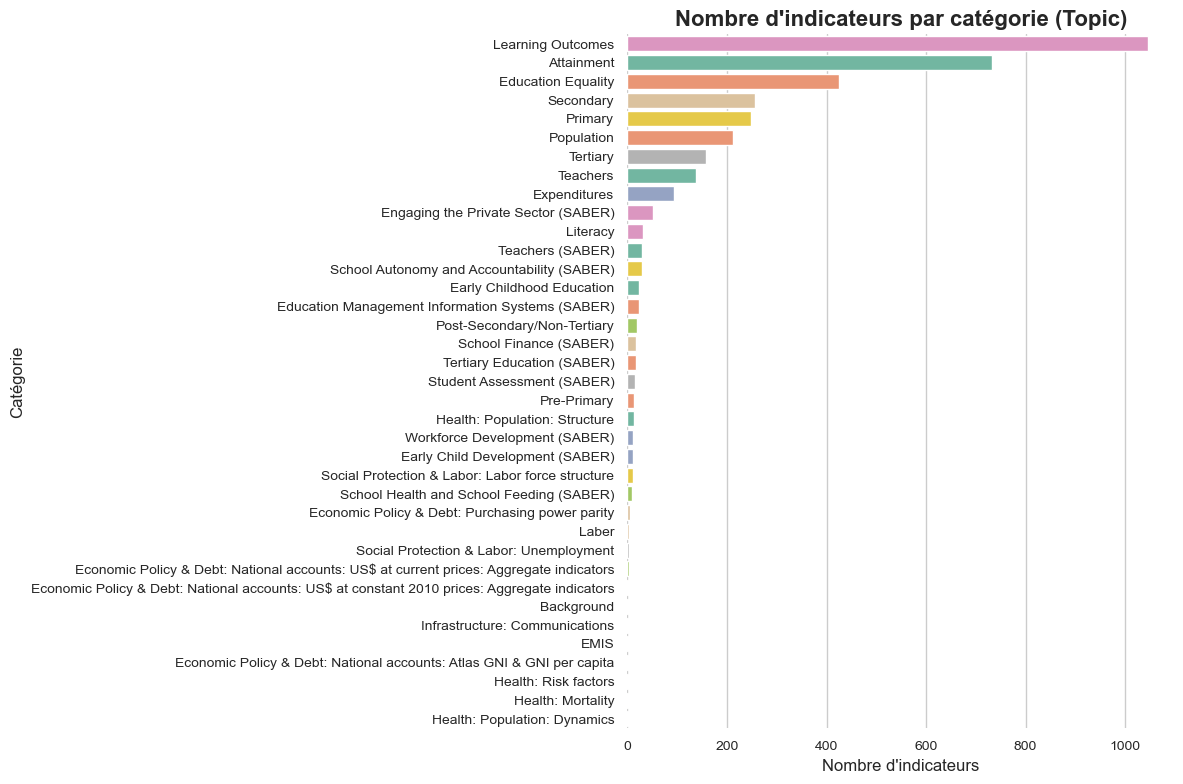

In [337]:
# Application du thème global
sns.set_theme(style="whitegrid")
# Taille de la figure
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    data=Series,
    y=category_col,
    hue=category_col,  
    order=Series[category_col].value_counts().index,
    palette="Set2",
    legend=False 
)

# Titres et labels
plt.title("Nombre d'indicateurs par catégorie (Topic)", fontsize=16, weight='bold')
plt.xlabel("Nombre d'indicateurs", fontsize=12)
plt.ylabel("Catégorie", fontsize=12)

# Esthétique
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

**Sélection métier**

- Choix de **dix grandes catégories** pertinentes pour Academy qui seront stockés dans la variable `categories_pertinentes` :
  - `Education`
  - `Population`
  - `Science and Technology`
  - `Economic Policy & Debt`
  - `Infrastructure`
  - `Labor & Social Protection`
  - `Health`
  - `Social Development`
  - `Poverty`
  - `ICT`

In [338]:
# Sélection des catégories pertinentes pour academy (EdTech lycée/université)
categories_pertinentes = [
    'Education',
    'Population', 
    'Science and Technology',
    'Economic Policy & Debt',
    'Infrastructure',
    'Labor & Social Protection',      # emploi, accès social
    'Health',                         # parfois lié à scolarisation
    'Social Development',             # accès, égalité, conditions
    'Poverty',                        # pouvoir d’achat ≈ potentiel client
    'ICT',                            # pour Internet, tech & accès numérique
]

- Filtrage du fichier `Series` pour ne garder que les indicateurs liés à ces thèmes.

In [339]:
print("Filtrage par catégories pertinentes:")
print(f"Catégories sélectionnées: {categories_pertinentes}")

# Filtrage des indicateurs par catégories pertinentes
series_filtered = Series[Series[category_col].isin(categories_pertinentes)]
print(f"Nombre d'indicateurs après filtrage par catégorie: {len(series_filtered)}")

# Récupération des codes des indicateurs filtrés
indicateurs_codes = series_filtered['Series Code'].tolist()

Filtrage par catégories pertinentes:
Catégories sélectionnées: ['Education', 'Population', 'Science and Technology', 'Economic Policy & Debt', 'Infrastructure', 'Labor & Social Protection', 'Health', 'Social Development', 'Poverty', 'ICT']
Nombre d'indicateurs après filtrage par catégorie: 213


**B) - Nettoyage des années du dataframe `Data`**
- Plage d'années disponible dans `Data` : de **1970 à 2100**.
- Identification d'années futures (**2030 à 2100**) contenant **aucune donnée** utile.
- Filtrage des années pour ne garder que celles **pertinentes** : **de 2000 à 2025**.

In [340]:
# Filtrage du dataset Data pour ne garder que les indicateurs pertinentes
data_filtered = Data[Data['Indicator Code'].isin(indicateurs_codes)]
# Analyse des colonnes années dans le dataset Data
year_columns = [col for col in Data.columns if col.isdigit()]
print(f"Années disponibles: {min(year_columns)} à {max(year_columns)}")
print(f"Nombre total d'années: {len(year_columns)}")
# Analyse des valeurs futures
current_year = 2025
future_years = [col for col in year_columns if int(col) > current_year]
if future_years:
    print(f"Années futures détectées: {future_years}")
    print("Raison possible: projections démographiques ou estimations")
    # Vérifier si ces années futures contiennent des données
    future_data_count = data_filtered[future_years].notna().sum().sum()
    print(f"Nombre de valeurs non-nulles pour les années futures: {future_data_count}")
# Filtrage des années pertinentes (2000-2024 pour avoir des données récentes et historiques)
years_pertinentes = [col for col in year_columns if 2000 <= int(col) <= 2025]
print(f"Années sélectionnées pour l'analyse: {min(years_pertinentes)} à {max(years_pertinentes)}")
print(f"Nombre d'années retenues: {len(years_pertinentes)}")

# Dataset final filtré
data_final = data_filtered[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + years_pertinentes]
print(f"Dimensions du dataset final: {data_final.shape}")

Années disponibles: 1970 à 2100
Nombre total d'années: 65
Années futures détectées: ['2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']
Raison possible: projections démographiques ou estimations
Nombre de valeurs non-nulles pour les années futures: 0
Années sélectionnées pour l'analyse: 2000 à 2025
Nombre d'années retenues: 20
Dimensions du dataset final: (46008, 24)


**Résultat**
- Un dataset réduit nommé `data_final`, avec uniquement :
  - Les pays valides
  - Les indicateurs métier pertinents
  - Les années de 2000 à 2025
  - Les années futures correspondent probablement à des projections démographiques ou estimations
-  **Dimensions finales : 48 990 lignes × 24 colonnes**

> Ce jeu de données réduit constitue une base propre et ciblée pour les analyses suivantes (qualité des données, sélection des meilleurs indicateurs).

**Visualisation du proportion d’indicateurs renseignés par année du dataframe `Data`**

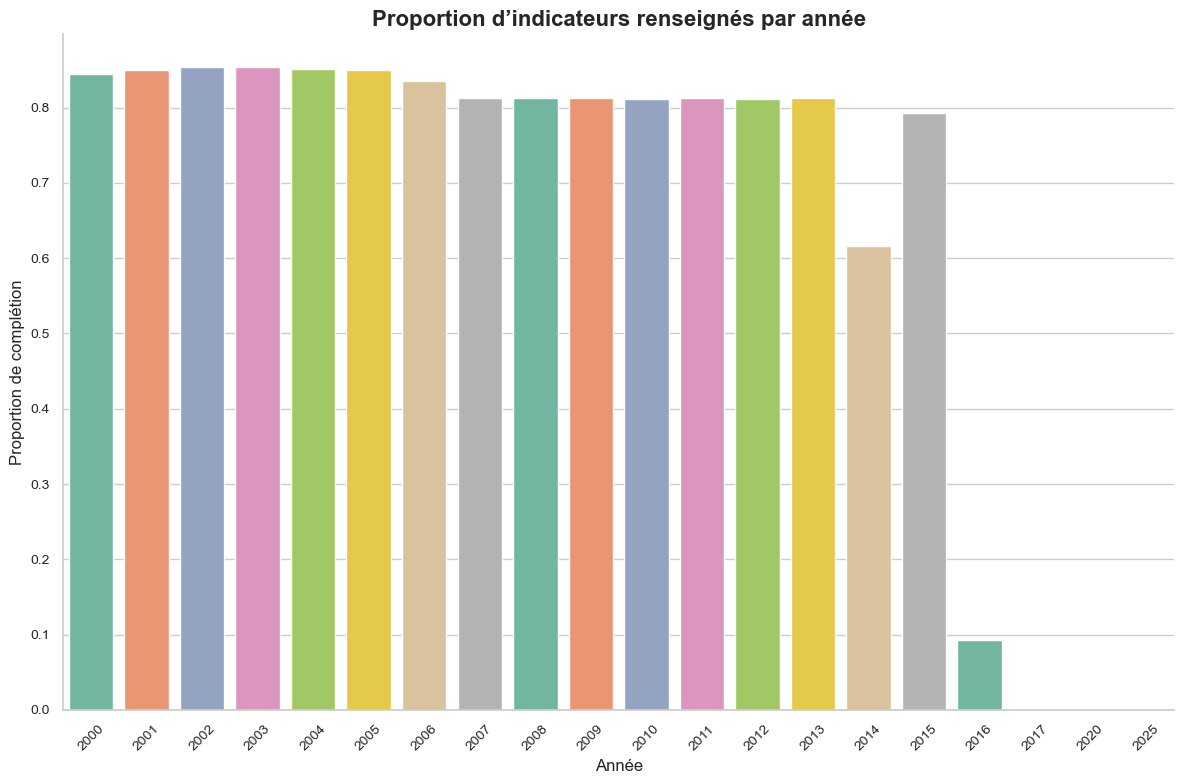

In [341]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Ajout d'un type float pour être sûr que la proportion s’affiche correctement
prop_year_df['Année'] = prop_year_df['Année'].astype(str)

ax = sns.barplot(
    data=prop_year_df.sort_values("Année"),
    x="Année",
    y="Proportion",
    hue="Année",         # pour palette sans warning
    palette="Set2",
    legend=False
)

plt.title("Proportion d’indicateurs renseignés par année", fontsize=16, weight='bold')
plt.xlabel("Année", fontsize=12)
plt.ylabel("Proportion de complétion", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

### Étape 2 : Réduction du périmètre en utilisant une approche data

Dans cette étape, nous appliquons une approche data pour sélectionner uniquement les **indicateurs les plus riches en données**, en complément de notre sélection métier.

**1. Proportion de valeurs renseignées par année**
- Pour chaque année de 2000 à 2025, nous avons mesuré la proportion d’indicateurs renseignés.
- Les meilleures années tournent autour de **2002 à 2006**, avec plus de **x % de complétude**.

In [342]:
# Proportion d'indicateurs renseignés par année
prop_by_year = {}
for year in years_pertinentes:
    prop_by_year[year] = data_final[year].notna().sum() / len(data_final)

prop_year_df = pd.DataFrame(list(prop_by_year.items()), columns=['Année', 'Proportion'])
print("Meilleures années:")
display(prop_year_df.sort_values('Proportion', ascending=False))

Meilleures années:


,Année,Proportion
2,2002,0.874239
3,2003,0.874196
4,2004,0.870544
5,2005,0.870218
1,2001,0.869392
0,2000,0.863915
6,2006,0.854634
9,2009,0.831747
7,2007,0.831486
8,2008,0.831486


**2. Proportion d’années renseignées par indicateur**
- Nous avons mesuré, pour chaque indicateur, la proportion d'années renseignées.
- Cela nous permet d’identifier les indicateurs qui ont une couverture temporelle suffisante.

In [343]:
# Proportion d'années renseignées par indicateur
prop_by_indicator = {}
for idx, row in data_final.iterrows():
    indicator_code = row['Indicator Code']
    values_present = row[years_pertinentes].notna().sum()
    prop_by_indicator[indicator_code] = values_present / len(years_pertinentes)

**3. Nombre de pays renseignés par indicateur et par année**
- Pour chaque couple (indicateur, année), nous avons calculé le **nombre de pays avec une valeur disponible**.
- Cela permet d’évaluer la densité réelle des données.

In [344]:
# Compter les pays par indicateur et par année
data_melted = data_final.melt(
    id_vars=['Country Code', 'Indicator Code'],
    value_vars=years_pertinentes,
    var_name='Year',
    value_name='Value'
)

# Calcul du nombre de pays avec des valeurs par indicateur et année
richesse_donnees = data_melted.groupby(['Indicator Code', 'Year'])['Value'].count().reset_index()
richesse_donnees.columns = ['Indicator Code', 'Year', 'Nb_Pays_Renseignés']
richesse_donnees.head()

,Indicator Code,Year,Nb_Pays_Renseignés
0,SP.POP.0305.FE.UN,2000,188
1,SP.POP.0305.FE.UN,2001,189
2,SP.POP.0305.FE.UN,2002,190
3,SP.POP.0305.FE.UN,2003,190
4,SP.POP.0305.FE.UN,2004,189


In [398]:
# Calcul de la moyenne de pays renseignés par indicateur
richesse_moyenne = richesse_donnees.groupby('Indicator Code')['Nb_Pays_Renseignés'].agg(['mean', 'max', 'min']).reset_index()
richesse_moyenne.columns = ['Indicator Code', 'Moyenne_Pays', 'Max_Pays', 'Min_Pays']
richesse_moyenne = richesse_moyenne.sort_values('Moyenne_Pays', ascending=False)

In [399]:
richesse_moyenne.head()

,Indicator Code,Moyenne_Pays,Max_Pays,Min_Pays
196,SP.SEC.UTOT.IN,162.65,196,0
190,SP.SEC.LTOT.IN,162.55,195,0
193,SP.SEC.TOTL.IN,162.40,195,0
181,SP.PRE.TOTL.IN,162.35,195,0
195,SP.SEC.UTOT.FE.IN,161.90,195,0


**4. Sélection finale**
- Nous avons sélectionné les **20 indicateurs les plus riches** (en nombre moyen de pays renseignés sur les années retenues).
- Cela nous garantit un socle solide pour des analyses comparatives entre pays.

In [400]:
# Ajout des noms des indicateurs
richesse_avec_noms = richesse_moyenne.merge(data_final[['Indicator Code', 'Indicator Name']].drop_duplicates(),on='Indicator Code')
print("Top 20 indicateurs les plus riches:")
display(richesse_avec_noms[['Indicator Code', 'Indicator Name', 'Moyenne_Pays']].head(20))

Top 20 indicateurs les plus riches:


,Indicator Code,Indicator Name,Moyenne_Pays
0,SP.SEC.UTOT.IN,Population of the official age for upper secon...,162.65
1,SP.SEC.LTOT.IN,Population of the official age for lower secon...,162.55
2,SP.SEC.TOTL.IN,Population of the official age for secondary e...,162.40
3,SP.PRE.TOTL.IN,Population of the official age for pre-primary...,162.35
4,SP.SEC.UTOT.FE.IN,Population of the official age for upper secon...,161.90
5,SP.SEC.UTOT.MA.IN,Population of the official age for upper secon...,161.90
6,SP.SEC.LTOT.FE.IN,Population of the official age for lower secon...,161.80
7,SP.SEC.LTOT.MA.IN,Population of the official age for lower secon...,161.80
8,UIS.SAP.23.GPV.G1,Population of the official entrance age to sec...,161.65
9,SP.SEC.TOTL.FE.IN,Population of the official age for secondary e...,161.65


**Visualisation du top 20 des indicateurs les plus renseignés du dataframe enrichi `richesse_avec_noms`**

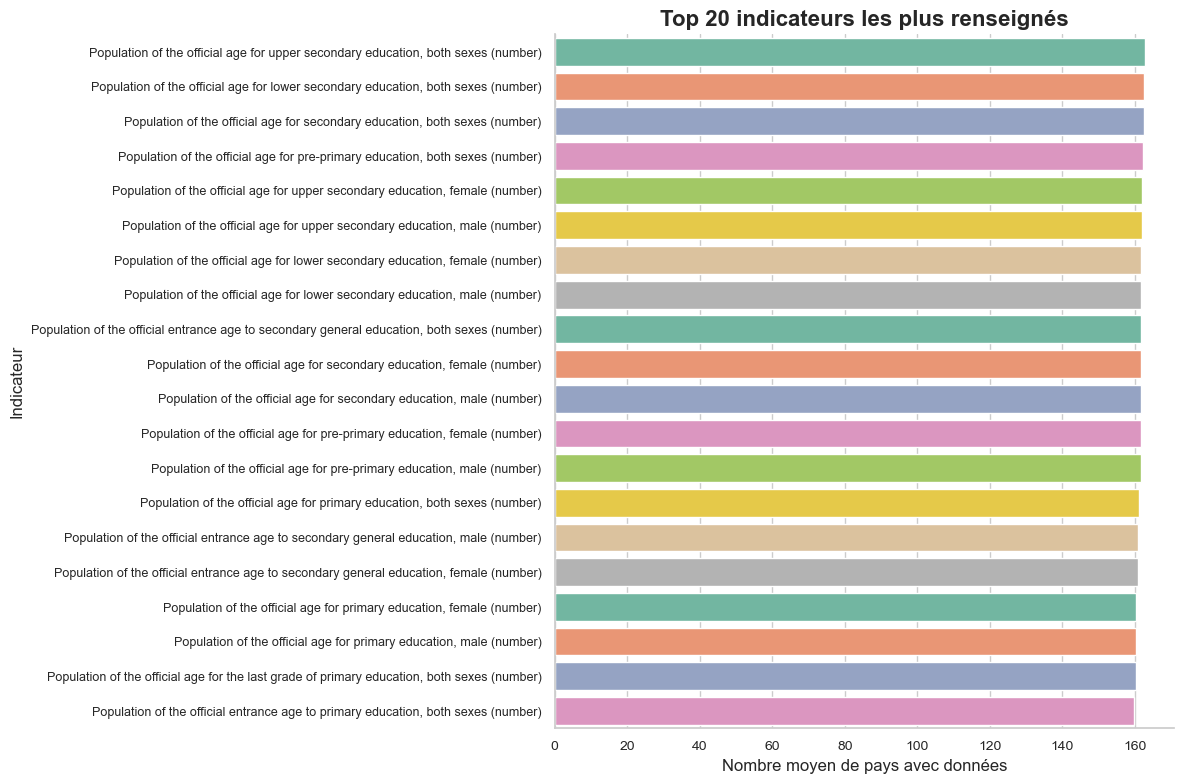

In [348]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=richesse_avec_noms.head(20),
    y="Indicator Name",
    x="Moyenne_Pays",
    hue="Indicator Name",
    palette="Set2",
    legend=False
)

plt.title("Top 20 indicateurs les plus renseignés", fontsize=16, weight='bold')
plt.xlabel("Nombre moyen de pays avec données", fontsize=12)
plt.ylabel("Indicateur", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)
sns.despine()
plt.tight_layout()
plt.show()

In [401]:
# Sélection des 20 meilleurs indicateurs
indicateurs_academy_final = richesse_avec_noms.head(20)['Indicator Code'].tolist()

#  Filtrage du dataset final
data_academy = data_final[data_final['Indicator Code'].isin(indicateurs_academy_final)]

print(f"Dataset academy final: {data_academy.shape}")
print(f"Pays: {data_academy['Country Code'].nunique()}")
print(f"Indicateurs: {data_academy['Indicator Code'].nunique()}")

Dataset academy final: (4320, 24)
Pays: 216
Indicateurs: 20


In [404]:
# Dataset final academy
data_academy = data_final[data_final['Indicator Code'].isin(indicateurs_academy_final)]

print(f"Dataset academy final: {data_academy.shape}")
print(f"Pays: {data_academy['Country Code'].nunique()}")
print(f"Indicateurs: {data_academy['Indicator Code'].nunique()}")

print("\nListe des indicateurs finaux:")
for i in indicateurs_academy_final:
    name = data_academy[data_academy['Indicator Code']==i]['Indicator Name'].iloc[0]
    print(f"- {i}: {name}")


Dataset academy final: (4320, 24)
Pays: 216
Indicateurs: 20

Liste des indicateurs finaux:
- SP.SEC.UTOT.IN: Population of the official age for upper secondary education, both sexes (number)
- SP.SEC.LTOT.IN: Population of the official age for lower secondary education, both sexes (number)
- SP.SEC.TOTL.IN: Population of the official age for secondary education, both sexes (number)
- SP.PRE.TOTL.IN: Population of the official age for pre-primary education, both sexes (number)
- SP.SEC.UTOT.FE.IN: Population of the official age for upper secondary education, female (number)
- SP.SEC.UTOT.MA.IN: Population of the official age for upper secondary education, male (number)
- SP.SEC.LTOT.FE.IN: Population of the official age for lower secondary education, female (number)
- SP.SEC.LTOT.MA.IN: Population of the official age for lower secondary education, male (number)
- UIS.SAP.23.GPV.G1: Population of the official entrance age to secondary general education, both sexes (number)
- SP.SEC.TOTL.

#### Résultat final
- **Dataset `data_academy` filtré :** 4 320 lignes × 24 colonnes  
- **Pays représentés :** 216  
- **Indicateurs retenus :** 20


### Étape 3 : Consolidation des résultats dans un dataframe agréger par pays

Nous consolidons nos résultats dans un dataframe agrégé, qui permettra de comparer les pays selon les indicateurs sélectionnés.

In [409]:
# Vérification du dataset de départ
print("Dataset de départ:")
print(f"- Shape: {data_academy.shape}")
print(f"- Pays uniques: {data_academy['Country Code'].nunique()}")
print(f"- Indicateurs: {data_academy['Indicator Code'].nunique()}")
print(f"- Années: {len(years_pertinentes)} ({min(years_pertinentes)}-{max(years_pertinentes)})")

Dataset de départ:
- Shape: (4320, 24)
- Pays uniques: 216
- Indicateurs: 20
- Années: 20 (2000-2025)


Formatage des données
- Le fichier `data_academy` est converti en format **long** : une ligne = un couple (pays, indicateur, année).
- Suppression des lignes sans valeur.

In [410]:
# Mise au format long (année = ligne)
data_long = data_academy.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    value_vars=years_pertinentes,
    var_name='Year',
    value_name='Value'
)

# Suppression des valeurs manquantes
data_long_clean = data_long.dropna(subset=['Value'])
print(f"Données avant nettoyage: {len(data_long):,} lignes")
print(f"Données après nettoyage: {len(data_long_clean):,} lignes")
print(f"Taux de remplissage global: {len(data_long_clean)/len(data_long)*100:.1f}%")

Données avant nettoyage: 86,400 lignes
Données après nettoyage: 64,580 lignes
Taux de remplissage global: 74.7%


#### Vérification de la couverture temporelle
- Pour chaque couple (pays, indicateur), nous comptons le nombre d'années renseignées.
- Résultat :
  - Moyenne ≈ **16,4 années disponibles** (sur 20),
  - Moins de **5 % des combinaisons** ont moins de 3 années renseignées ➤ **qualité jugée acceptable**.

In [356]:
# Analyse de la couverture temporelle (nb d'années par pays × indicateur)
couverture_temporelle = data_long_clean.groupby(['Country Code', 'Indicator Code']).size().reset_index(name='Nb_Années')
print(f"\nDistribution du nombre d'années par (pays, indicateur):")
print(couverture_temporelle['Nb_Années'].describe())

# Avertissement si trop de combinaisons peu renseignées
peu_annees = couverture_temporelle[couverture_temporelle['Nb_Années'] < 3]
pourcentage_peu_annees = len(peu_annees) / len(couverture_temporelle) * 100
print(f"\nCombinaisons avec < 3 années: {len(peu_annees)} ({pourcentage_peu_annees:.1f}%)")


Distribution du nombre d'années par (pays, indicateur):
count    3926.000000
mean       16.449312
std         1.938113
min         1.000000
25%        17.000000
50%        17.000000
75%        17.000000
max        17.000000
Name: Nb_Années, dtype: float64

Combinaisons avec < 3 années: 21 (0.5%)


#### Agrégation finale
- Nous utilisons `pivot_table()` pour agréger les valeurs **par pays et indicateur** (moyenne sur les années disponibles).
- Le tableau final `df_aggrege` contient :
  - Une ligne par **pays**,
  - Une colonne par **indicateur**,
  - Valeurs moyennes lissées dans le temps.

In [386]:
# Agrégation par pays et indicateur : moyenne des années
df_aggrege = data_long_clean.pivot_table(
    index=['Country Code', 'Country Name'],
    columns='Indicator Code',
    values='Value',
    aggfunc='mean'
).reset_index()

# Taux de remplissage moyen
colonnes_indicateurs = [col for col in df_aggrege.columns if col not in ['Country Code', 'Country Name']]
taux_remplissage = df_aggrege[colonnes_indicateurs].notna().mean().mean()
print(f"\nDataframe agrégé : {df_aggrege.shape}")
print(f"Taux de remplissage moyen : {taux_remplissage*100:.1f}%")


Dataframe agrégé : (198, 22)
Taux de remplissage moyen : 99.1%


In [387]:
#Aperçu 
display(df_aggrege.head())

Indicator Code,Country Code,Country Name,SP.PRE.TOTL.FE.IN,SP.PRE.TOTL.IN,SP.PRE.TOTL.MA.IN,SP.PRM.GRAD.TO,SP.PRM.TOTL.FE.IN,SP.PRM.TOTL.IN,SP.PRM.TOTL.MA.IN,SP.SEC.LTOT.FE.IN,SP.SEC.LTOT.IN,SP.SEC.LTOT.MA.IN,SP.SEC.TOTL.FE.IN,SP.SEC.TOTL.IN,SP.SEC.TOTL.MA.IN,SP.SEC.UTOT.FE.IN,SP.SEC.UTOT.IN,SP.SEC.UTOT.MA.IN,UIS.SAP.1.G1,UIS.SAP.23.GPV.G1,UIS.SAP.23.GPV.G1.F,UIS.SAP.23.GPV.G1.M
0,ABW,Aruba,1.345941e+03,2.742353e+03,1.396412e+03,1478.411765,4.306471e+03,8.714706e+03,4.408235e+03,1470.411765,2.955706e+03,1485.294118,3.639176e+03,7.316294e+03,3.677118e+03,2168.764706,4.360588e+03,2191.823529,1411.764706,1479.235294,735.705882,743.529412
1,AFG,Afghanistan,1.548204e+06,3.178587e+06,1.630383e+06,692767.500000,2.214142e+06,4.554592e+06,2.340449e+06,932351.312500,1.924085e+06,991733.750000,1.755195e+06,3.628039e+06,1.872844e+06,822843.937500,1.703954e+06,881110.312500,835487.176471,680217.235294,329909.529412,350307.705882
2,AGO,Angola,5.931535e+05,1.189072e+06,5.959181e+05,548237.117647,1.588960e+06,3.180823e+06,1.591864e+06,846471.882353,1.687903e+06,841431.294118,1.518136e+06,3.024640e+06,1.506504e+06,671663.882353,1.336737e+06,665072.882353,654423.294118,526787.411765,263834.647059,262952.764706
3,ALB,Albania,6.225359e+04,1.294335e+05,6.717994e+04,53902.235294,1.056762e+05,2.190763e+05,1.134001e+05,113028.823529,2.327251e+05,119696.294118,2.178890e+05,4.465026e+05,2.286136e+05,104860.176471,2.137775e+05,108917.294118,46568.411765,55892.411765,27073.647059,28818.764706
4,ARE,United Arab Emirates,6.359238e+04,1.305951e+05,6.700269e+04,58851.375000,1.507336e+05,3.124974e+05,1.617638e+05,106898.687500,2.308328e+05,123934.125000,1.947061e+05,4.369602e+05,2.422541e+05,87807.437500,2.061274e+05,118319.937500,64531.705882,NaN,NaN,NaN


#### Analyse du résultat
- **Taux de remplissage moyen :** sup à 90 % selon les indicateurs.
- Visualisation des pays les plus / moins renseignés.
- Calculs statistiques par indicateur : moyenne, écart-type, min/max.

In [411]:
df_aggrege['Score_Moyen'] = df_aggrege[colonnes_indicateurs].mean(axis=1)

In [412]:
# Statistiques descriptives
stats_indicateurs = df_aggrege[colonnes_indicateurs].describe()
display(stats_indicateurs.round(2))

Indicator Code,SP.PRE.TOTL.FE.IN,SP.PRE.TOTL.IN,SP.PRE.TOTL.MA.IN,SP.PRM.GRAD.TO,SP.PRM.TOTL.FE.IN,SP.PRM.TOTL.IN,SP.PRM.TOTL.MA.IN,SP.SEC.LTOT.FE.IN,SP.SEC.LTOT.IN,SP.SEC.LTOT.MA.IN,SP.SEC.TOTL.FE.IN,SP.SEC.TOTL.IN,SP.SEC.TOTL.MA.IN,SP.SEC.UTOT.FE.IN,SP.SEC.UTOT.IN,SP.SEC.UTOT.MA.IN,UIS.SAP.1.G1,UIS.SAP.23.GPV.G1,UIS.SAP.23.GPV.G1.F,UIS.SAP.23.GPV.G1.M
count,197.00,198.00,197.00,196.00,196.00,1.970000e+02,196.00,196.00,197.00,196.00,196.00,1.970000e+02,196.00,196.00,197.00,196.00,196.00,196.00,195.00,195.00
mean,824563.68,1699828.74,883888.86,633282.68,1688812.40,3.472136e+06,1801022.46,991511.99,2033914.86,1052774.11,1976693.09,4.053795e+06,2097774.97,985177.42,2019883.70,1045007.96,640812.60,634733.95,307572.01,327708.65
std,3104498.84,6557771.88,3469428.38,2316397.69,5699366.58,1.199960e+07,6329370.59,3393290.08,7104524.50,3728284.26,7375062.96,1.541719e+07,8079379.00,4006650.54,8363110.04,4376827.96,2255685.14,2337578.67,1114197.62,1229488.45
min,155.00,328.00,173.00,231.35,679.06,1.419240e+03,740.18,349.00,733.00,384.00,621.76,1.288470e+03,666.71,198.71,408.71,210.00,239.65,227.06,108.18,118.00
25%,32318.53,65092.72,34345.53,19959.79,58957.99,1.154944e+05,61681.28,37665.22,74944.76,38942.60,73746.56,1.459651e+05,75149.59,38036.94,68802.88,38279.97,25150.69,23553.15,11042.97,11449.44
50%,172051.24,344301.65,174483.06,114484.57,326016.03,6.502387e+05,331989.15,194939.97,391645.29,197955.91,371774.57,7.529918e+05,381837.97,172271.31,352980.88,180466.24,119080.29,113788.03,55381.76,57017.18
75%,638017.06,1300703.06,676629.00,491624.26,1301171.74,2.593278e+06,1345285.46,797001.73,1609435.94,816619.57,1497534.50,3.007500e+06,1507862.24,636666.63,1280923.25,650282.36,519219.31,481806.72,235098.65,242549.09
max,36167955.25,76412433.00,40244479.50,24649087.00,59100805.00,1.247162e+08,65615375.50,34682729.38,72928920.50,38246191.75,79722838.00,1.673205e+08,87597620.00,45040107.75,94391536.00,49351429.50,25231442.59,24543084.35,11655262.88,12887821.41


In [413]:
# Analyse des pays selon le nombre d'indicateurs renseignés
df_aggrege['Nb_Indicateurs_Renseignes'] = df_aggrege[colonnes_indicateurs].notna().sum(axis=1)

top_pays = df_aggrege.sort_values(
    by=['Nb_Indicateurs_Renseignes', 'Score_Moyen', 'Country Name'],
    ascending=[False, False, False]
)[['Country Name', 'Nb_Indicateurs_Renseignes', 'Score_Moyen']].head(10)
display(top_pays)

Indicator Code,Country Name,Nb_Indicateurs_Renseignes,Score_Moyen
81,India,20,5.852529e+07
33,China,20,4.374714e+07
80,Indonesia,20,9.898843e+06
186,United States,20,9.494954e+06
138,Pakistan,20,8.788692e+06
54,Euro area,20,8.746416e+06
24,Brazil,20,7.751763e+06
15,Bangladesh,20,7.727269e+06
130,Nigeria,20,7.673249e+06
115,Mexico,20,5.169277e+06


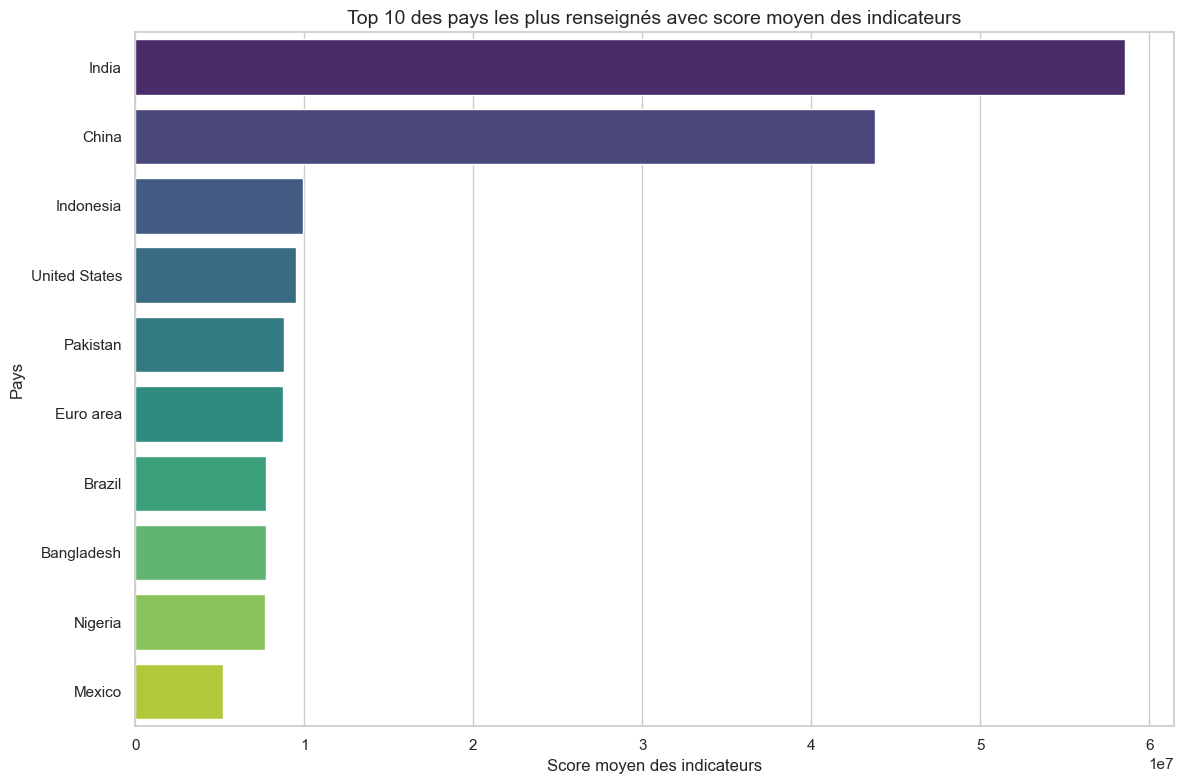

In [393]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y='Country Name',
    x='Score_Moyen',
    data=top_pays,
    hue='Country Name',       
    dodge=False,              #
    palette='viridis',
    legend=False             
)

plt.title("Top 10 des pays les plus renseignés avec score moyen des indicateurs", fontsize=14)
plt.xlabel("Score moyen des indicateurs")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()

In [394]:
bottom_pays = df_aggrege.sort_values(
    by=['Nb_Indicateurs_Renseignes','Score_Moyen', 'Country Name'],
    ascending=[True, True, True]
).head(10)[['Country Name', 'Nb_Indicateurs_Renseignes', 'Score_Moyen']]

print("\nPays avec le moins d'indicateurs renseignés:")
display(bottom_pays)

# Suppression colonne temporaire
df_aggrege = df_aggrege.drop('Nb_Indicateurs_Renseignes', axis=1)


Pays avec le moins d'indicateurs renseignés:


Indicator Code,Country Name,Nb_Indicateurs_Renseignes,Score_Moyen
190,British Virgin Islands,6,1.389344e+03
19,Bosnia and Herzegovina,7,5.092774e+04
4,United Arab Emirates,17,1.622005e+05
127,Malaysia,18,1.382699e+06
17,Bahrain,19,3.386671e+04
82,Ireland,19,1.262147e+05
135,Nauru,20,5.339618e+02
181,Tuvalu,20,5.564118e+02
67,Gibraltar,20,6.116500e+02
142,Palau,20,6.995875e+02


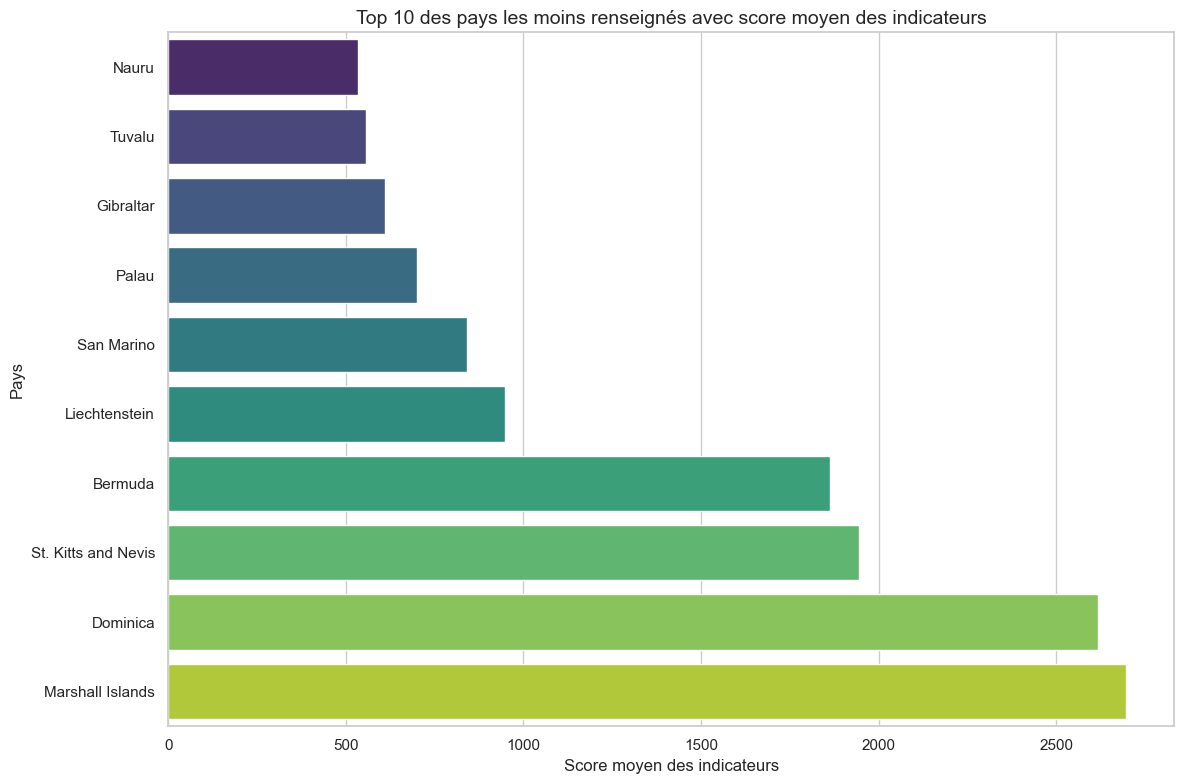

In [385]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    y='Country Name',
    x='Score_Moyen',
    data=bottom_pays,
    hue='Country Name',       
    dodge=False,              
    palette='viridis',
    legend=False             
)

plt.title("Top 10 des pays les moins renseignés avec le score moyen des indicateurs", fontsize=14)
plt.xlabel("Score moyen des indicateurs")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()

### Synthèse finale – Analyse exploratoire pour expansion internationale  
**Projet : Étude du potentiel client via les données de la Banque mondiale**  

---

## 🎯 Objectif de la mission

Explorer les données éducation/population de la Banque mondiale pour :
- Identifier les pays à fort potentiel pour les services EdTech d’Academy (niveau lycée/université),
- Évaluer la qualité, la couverture et la richesse des données,
- Produire un périmètre réduit et exploitable d’indicateurs-clés,
- Construire un classement utile à la priorisation de l’expansion géographique.

---

## 🛠️ Étapes réalisées

### 1. 🔍 Nettoyage et structuration
- 5 jeux de données analysés.
- Suppression des faux pays et régions agrégées (ex. "World", "Euro area", "Sub-Saharan Africa").
- Suppression des colonnes inutilisables et standardisation des années (2000 à 2025).

### 2. 🧠 Sélection métier des indicateurs
- Catégories retenues : *Education*, *Population*, *Science and Technology*, *Infrastructure*, *Economic Policy & Debt*.
- Réduction à 20 indicateurs directement liés à la population en âge scolaire, répartis par sexe et niveau.

### 3. 📊 Réduction par approche data
- Filtrage des indicateurs ayant une bonne couverture temporelle (proportion élevée de données renseignées).
- Suppression des années futures sans données effectives (2030+).
- Sélection finale de 20 indicateurs pertinents.

### 4. 🌍 Agrégation des données par pays
- Calcul du nombre d’indicateurs renseignés par pays.
- Calcul d’un score moyen par pays (moyenne des valeurs disponibles).
- Tri multicritère : complétude → score → nom du pays.

---

## 🌟 Résultat clé : pays à fort potentiel Academy

Les pays ressortant comme les plus pertinents combinent :
- Une excellente couverture de données (20/20 indicateurs),
- Une population massive en âge d’être scolarisée,
- Un score moyen élevé sur les indicateurs éducatifs sélectionnés.

> Parmi eux : **Inde, Chine, Indonésie, États-Unis, Pakistan, Brésil, Bangladesh, Nigeria, Mexique**, etc.

---

## ✅ Recommandations

1. Prioriser l’analyse stratégique et le go-to-market dans ces pays.
2. Compléter l’analyse avec des indicateurs secondaires (connectivité, dépenses éducation, scolarisation réelle).
3. Affiner la liste des faux pays au fil du temps.
4. Utiliser la structure actuelle comme base pour intégrer de nouveaux indicateurs métier.

---
